# Jupyter notebook for developing GXB model with top 10 proteomics +- clinical features and comparing to Cox model

In [1]:
import pandas as pd
# Load the imputed train and test datasets
train = pd.read_csv('/well/clifton/projects/ukb_v2/derived/prot_final/train_imp_simple.csv')
test = pd.read_csv('/well/clifton/projects/ukb_v2/derived/prot_final/test_imp_simple.csv')
train.head()

,Myeloma,time,Age,Sex,Back Pain,Chest Pain,Haemoglobin,MCV,Platelet Count,White Blood Cell Count,...,PRELP,PAMR1,FCRL2,IDS,FRZB,PTS,CLEC4A,FCRLB,AMFR,CD79B
0,0.0,14.510609,57.11,1.0,0.0,0.0,14.90,95.50,234.0,6.00,...,-0.25130,-0.66280,-1.30595,-0.00900,-0.06415,-0.54830,-0.29830,0.2516,-0.50445,-0.2346
1,0.0,12.774812,62.10,0.0,0.0,1.0,13.25,92.65,244.9,4.88,...,0.01805,0.20265,0.28255,0.01515,0.29115,1.13440,-0.12215,0.6777,0.06785,-0.3659
2,0.0,4.506502,51.56,1.0,0.0,0.0,16.45,86.66,243.9,7.82,...,-0.28160,-0.08720,-0.32755,-0.03120,-0.28175,0.41315,0.05015,-0.2285,0.82985,0.0884
3,0.0,13.995893,68.05,1.0,0.0,1.0,17.92,93.81,249.1,11.00,...,-0.03560,0.26240,-0.21145,0.12060,0.34995,0.51370,-0.21390,0.0219,1.24185,0.0501
4,0.0,14.472279,60.90,1.0,0.0,0.0,15.80,94.60,357.0,9.20,...,0.03430,0.27600,0.06415,-0.08310,-0.14365,1.41890,-0.32670,-0.3079,0.43595,0.2456


In [25]:
import numpy as np
# Extract necessary features for the training set
features = ['Age', 'Sex', 'Back Pain', 'Chest Pain',
            'Haemoglobin', 'MCV', 'Platelet Count', 'White Blood Cell Count', 'CRP', 'Calcium', 'SLAMF7', 'TNFRSF17', 'QPCT', 'LY9', 'SLAMF1', 'CNTN5', 'TNFRSF13B',
    'TNFSF13', 'TNFSF13B', 'TIMP1']
prot_features = ['SLAMF7', 'TNFRSF17', 'QPCT', 'LY9', 'SLAMF1', 'CNTN5', 'TNFRSF13B',
    'TNFSF13', 'TNFSF13B', 'TIMP1']

clin_dtrain = train[features]
prot_dtrain = train[prot_features]

# Prepare y_train suitable for Cox loss function
y_train_xgb = pd.Series(np.where(train['Myeloma'] == 0, -train['time'], train['time']), name='y_cox_loss')


# Extract necessary features for the test set
dtest = test[features]
dtrain = train[features]

# Prepare y_test suitable for Cox loss function
y_test_xgb = pd.Series(np.where(test['Myeloma'] == 0, -test['time'], test['time']), name='y_cox_loss')
y_train_xgb = pd.Series(np.where(train['Myeloma'] == 0, -train['time'], train['time']), name='y_cox_loss')

# Print the first few rows of the prepared datasets
print("Training features (dtrain):")
print(clin_dtrain.head())

print("\nTraining labels (y_train):")
print(y_train_xgb.head())

print("\nTest features (dtest):")
print(dtest.head())

print("\nTest labels (y_test):")
print(y_test_xgb.head())
# Count of positive and negative values
positive_count = (y_train_xgb > 0).sum()
negative_count = (y_train_xgb < 0).sum()

print(f"Positive values count: {positive_count}")
print(f"Negative values count: {negative_count}")
# Count of positive and negative values
positive_count = (y_test_xgb > 0).sum()
negative_count = (y_test_xgb < 0).sum()

print(f"Positive values count: {positive_count}")
print(f"Negative values count: {negative_count}")


Training features (dtrain):
     Age  Sex  Back Pain  Chest Pain  Haemoglobin    MCV  Platelet Count  \
0  57.11  1.0        0.0         0.0        14.90  95.50           234.0   
1  62.10  0.0        0.0         1.0        13.25  92.65           244.9   
2  51.56  1.0        0.0         0.0        16.45  86.66           243.9   
3  68.05  1.0        0.0         1.0        17.92  93.81           249.1   
4  60.90  1.0        0.0         0.0        15.80  94.60           357.0   

   White Blood Cell Count   CRP   Calcium  SLAMF7  TNFRSF17    QPCT      LY9  \
0                    6.00  2.49  2.351000  0.4495  0.612800 -0.1746  0.14260   
1                    4.88  0.64  2.390461  0.6740  0.360525 -0.0681  0.26205   
2                    7.82  2.15  1.992000 -0.0542 -0.264000 -0.2701 -0.47470   
3                   11.00  0.95  2.409000 -0.0448 -0.411000  0.1050 -0.32830   
4                    9.20  2.88  2.310000 -0.4290  0.018000  0.3865  0.02880   

    SLAMF1   CNTN5  TNFRSF13B  TNF

In [26]:
from joblib import load
import pickle
model_path_pkl = '/well/clifton/users/ncu080/UKB_Project/models/prot_xgb_gs.pkl'
with open(model_path_pkl, 'rb') as file:
    prot_model = pickle.load(file)

In [27]:
from joblib import load
import pickle
model_path_pkl = '/well/clifton/users/ncu080/UKB_Project/models/clin_prot_xgb_gs.pkl'
with open(model_path_pkl, 'rb') as file:
    clin_prot_model = pickle.load(file)

In [28]:
import shap
print(shap.__version__)
# Use the TreeExplainer for XGBoost model
explainer = shap.TreeExplainer(clin_prot_model)

# Calculate SHAP values for the dataset
shap_values = explainer.shap_values(clin_dtrain)
# Convert SHAP values to DataFrame for easy manipulation
shap_values_df = pd.DataFrame(shap_values, columns=clin_dtrain.columns) 

0.46.0


In [29]:
import shap
print(shap.__version__)
# Use the TreeExplainer for XGBoost model
explainer = shap.TreeExplainer(prot_model)

# Calculate SHAP values for the dataset
shap_values_prot = explainer.shap_values(prot_dtrain)
# Convert SHAP values to DataFrame for easy manipulation
shap_values_df_prot = pd.DataFrame(shap_values_prot, columns=prot_dtrain.columns) 

0.46.0


## SHAP of clin prot XGB

In [32]:
# Compute mean absolute SHAP values for each feature
mean_abs_shap_values = shap_values_df.abs().mean(axis=0)

# Sort features by mean absolute SHAP values
sorted_shap_values = mean_abs_shap_values.sort_values(ascending=False)

# Extract top 10 and top 20 features
top_10_features = sorted_shap_values.head(10).index
top_20_features = sorted_shap_values.head(20).index

In [37]:
# Compute mean absolute SHAP values for each feature
mean_abs_shap_values_prot = shap_values_df_prot.abs().mean(axis=0)

# Sort features by mean absolute SHAP values
sorted_shap_values_prot = mean_abs_shap_values_prot.sort_values(ascending=False)

# Extract top 10 and top 20 features
top_10_features_prot = sorted_shap_values_prot.head(10).index

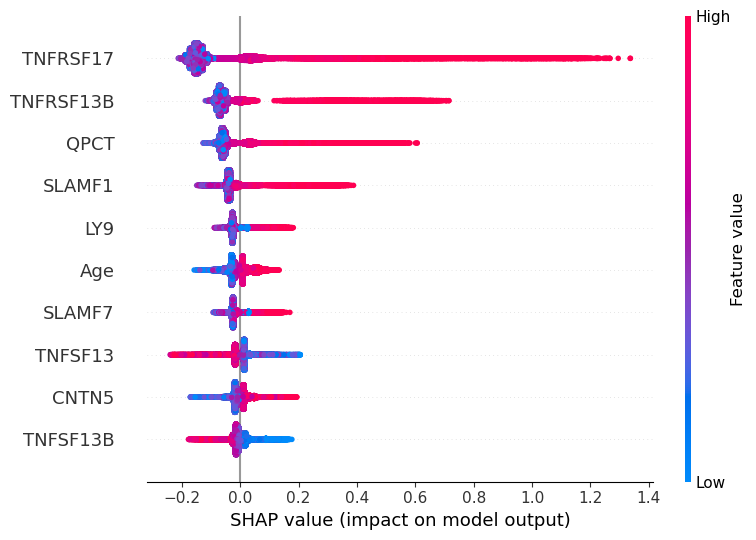

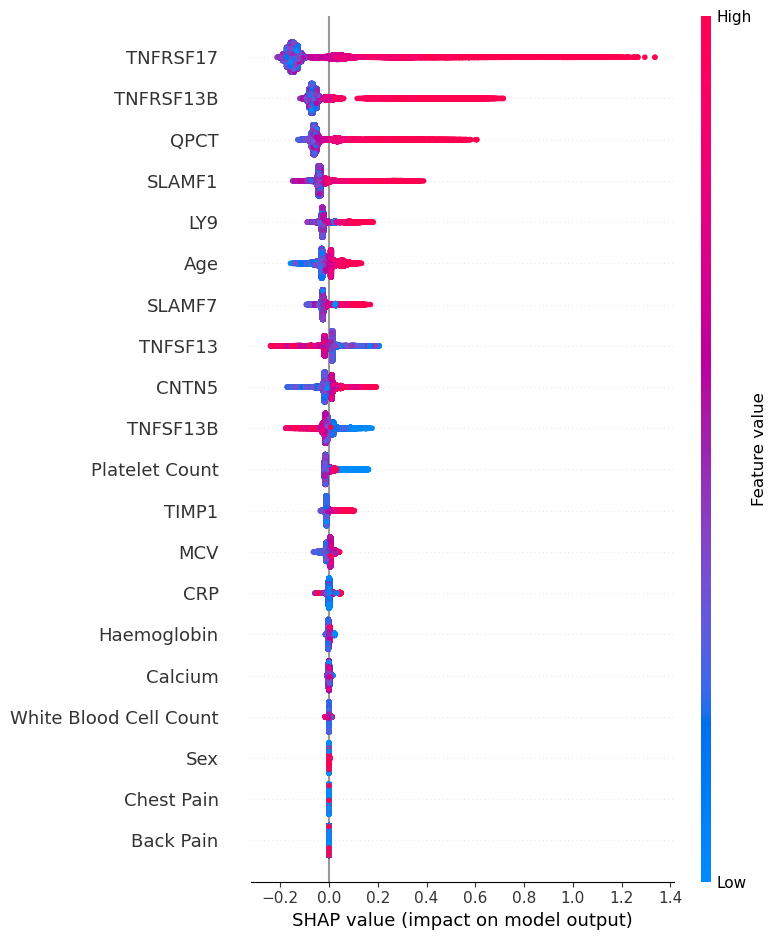

In [34]:
# Ensure we are subsetting correctly by feature names
top_10_shap_values = shap_values[:, shap_values_df.columns.get_indexer(top_10_features)]
top_20_shap_values = shap_values[:, shap_values_df.columns.get_indexer(top_20_features)]

# Beeswarm plot for top 10 SHAP values
shap.summary_plot(top_10_shap_values, clin_dtrain[top_10_features], plot_type="dot")

# Beeswarm plot for top 20 SHAP values
shap.summary_plot(top_20_shap_values, clin_dtrain[top_20_features], plot_type="dot")

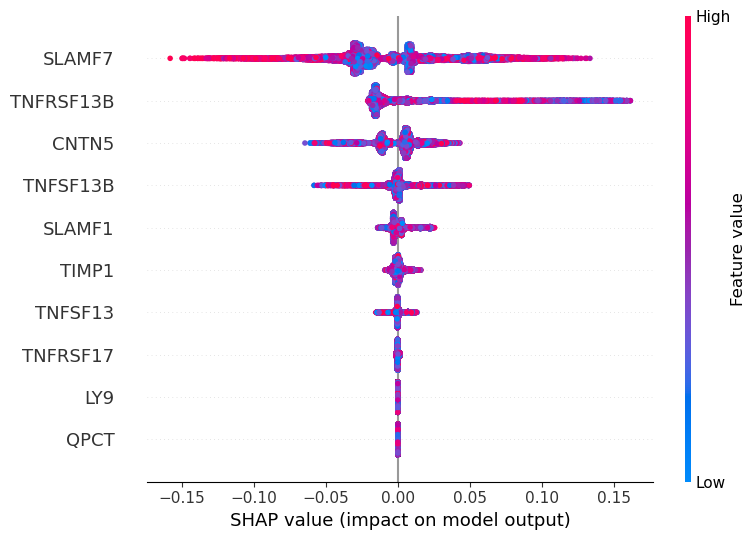

In [38]:
# Ensure we are subsetting correctly by feature names
top_10_shap_values_prot = shap_values[:, shap_values_df_prot.columns.get_indexer(top_10_features_prot)]

# Beeswarm plot for top 10 SHAP values
shap.summary_plot(top_10_shap_values_prot, prot_dtrain[top_10_features_prot], plot_type="dot")

In [35]:
print(dtest.columns)

Index(['Age', 'Sex', 'Back Pain', 'Chest Pain', 'Haemoglobin', 'MCV',
       'Platelet Count', 'White Blood Cell Count', 'CRP', 'Calcium', 'SLAMF7',
       'TNFRSF17', 'QPCT', 'LY9', 'SLAMF1', 'CNTN5', 'TNFRSF13B', 'TNFSF13',
       'TNFSF13B', 'TIMP1'],
      dtype='object')


## AUROC

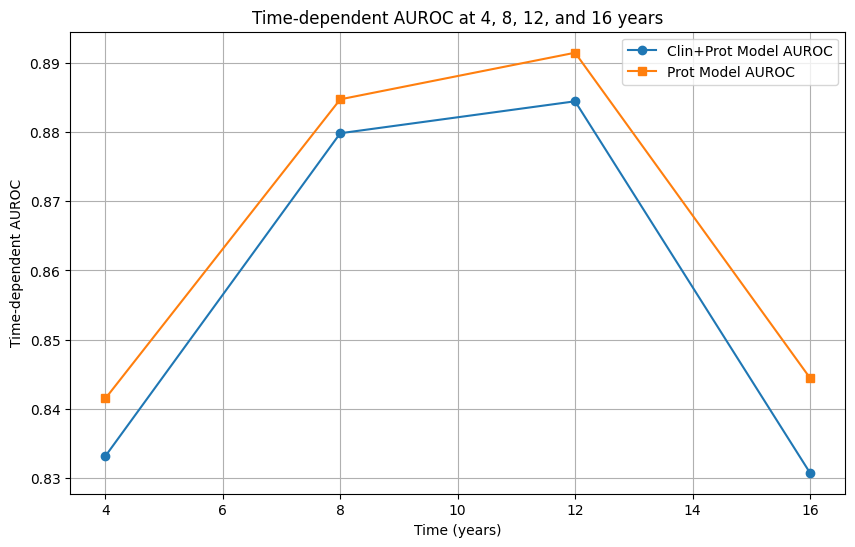

   Time (years)  C-index Clin+Prot  C-index Prot
0             4           0.876319      0.884896
1             8           0.876319      0.884896
2            12           0.876319      0.884896
3            16           0.876319      0.884896


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sksurv.metrics import concordance_index_censored, cumulative_dynamic_auc
from lifelines.utils import concordance_index

# Assuming the data is already preprocessed and models are loaded
# clin_prot_model and prot_model are loaded using pickle

# Prepare the test dataset
X_test_clin_prot = dtest[features]
X_test_prot = dtest[prot_features]
y_test = pd.Series(np.where(test['Myeloma'] == 0, -test['time'], test['time']), name='y_cox_loss')

# Predict the survival risk for both models
risk_clin_prot = clin_prot_model.predict(X_test_clin_prot)
risk_prot = prot_model.predict(X_test_prot)

# Time points for evaluation (in years)
time_points = np.array([4, 8, 12, 16])

# Prepare the y_test in the format required by sksurv (structured array for survival data)
y_test_structured = np.array([(e, t) for e, t in zip(test['Myeloma'], test['time'])],
                             dtype=[('event', bool), ('time', float)])

# Cumulative dynamic AUC for both models
# Clinical + Proteomics model
cumulative_auc_clin_prot, mean_auc_clin_prot = cumulative_dynamic_auc(
    y_test_structured, y_test_structured, risk_clin_prot, time_points
)

# Proteomics-only model
cumulative_auc_prot, mean_auc_prot = cumulative_dynamic_auc(
    y_test_structured, y_test_structured, risk_prot, time_points
)

# Plot the time-dependent AUROC curves
plt.figure(figsize=(10, 6))
plt.plot(time_points, cumulative_auc_clin_prot, label='Clin+Prot Model AUROC', marker='o')
plt.plot(time_points, cumulative_auc_prot, label='Prot Model AUROC', marker='s')
plt.xlabel('Time (years)')
plt.ylabel('Time-dependent AUROC')
plt.title('Time-dependent AUROC at 4, 8, 12, and 16 years')
plt.legend()
plt.grid(True)
plt.show()

# C-index for both models at each time point
c_index_clin_prot = []
c_index_prot = []

for time_point in time_points:
    # Clinical + Proteomics model C-index
    c_index_cp = concordance_index_censored(test['Myeloma'] == 1, test['time'], risk_clin_prot)
    c_index_clin_prot.append(c_index_cp[0])  # c-index is the first value in the tuple
    
    # Proteomics-only model C-index
    c_index_p = concordance_index_censored(test['Myeloma'] == 1, test['time'], risk_prot)
    c_index_prot.append(c_index_p[0])

# Display the C-index at each time point
c_index_results = pd.DataFrame({
    'Time (years)': time_points,
    'C-index Clin+Prot': c_index_clin_prot,
    'C-index Prot': c_index_prot
})

print(c_index_results)

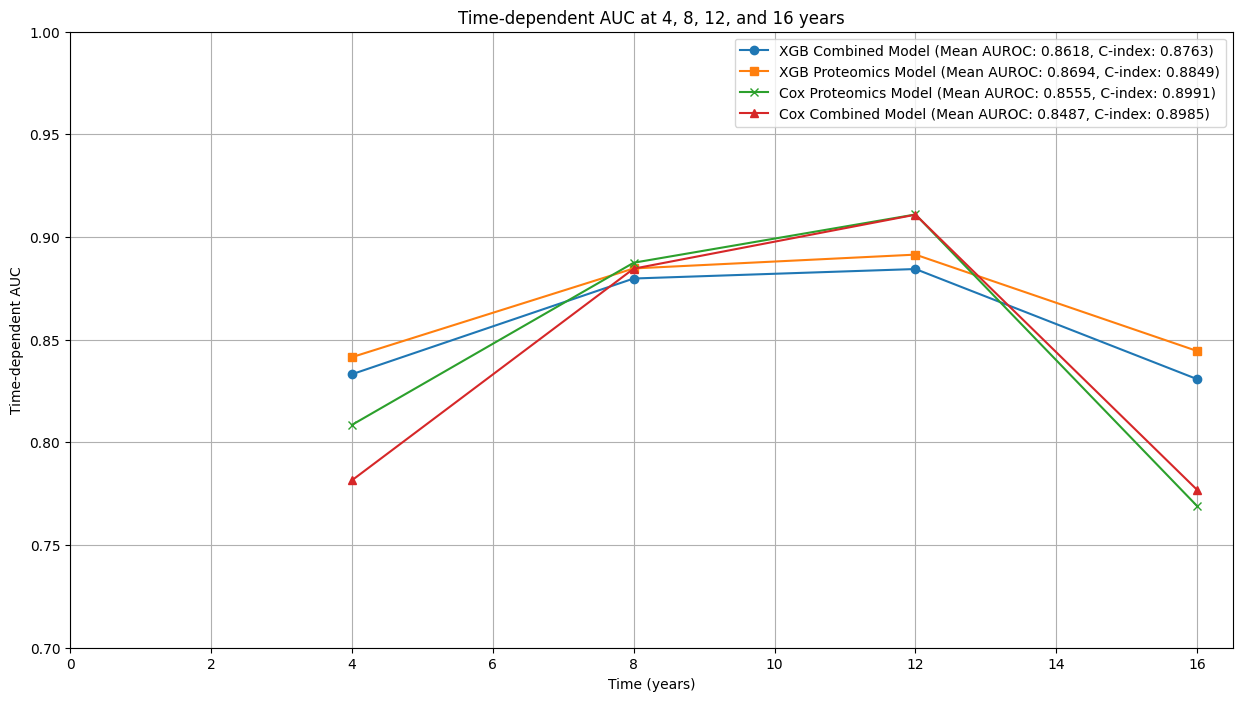

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sksurv.metrics import concordance_index_censored, cumulative_dynamic_auc

# Assuming the data is already preprocessed and models are loaded
# clin_prot_model and prot_model are loaded using pickle

# Prepare the test dataset
X_test_clin_prot = dtest[features]
X_test_prot = dtest[prot_features]
y_test = pd.Series(np.where(test['Myeloma'] == 0, -test['time'], test['time']), name='y_cox_loss')

# Predict the survival risk for both XGBoost models
risk_clin_prot = clin_prot_model.predict(X_test_clin_prot)
risk_prot = prot_model.predict(X_test_prot)

# Time points for evaluation (in years)
time_points = np.array([4, 8, 12, 16])

# Prepare the y_test in the format required by sksurv (structured array for survival data)
y_test_structured = np.array([(e, t) for e, t in zip(test['Myeloma'], test['time'])],
                             dtype=[('event', bool), ('time', float)])

# Cumulative dynamic AUC for XGBoost models
# Clinical + Proteomics model (XGBoost)
cumulative_auc_clin_prot, mean_auc_clin_prot = cumulative_dynamic_auc(
    y_test_structured, y_test_structured, risk_clin_prot, time_points
)

# Proteomics-only model (XGBoost)
cumulative_auc_prot, mean_auc_prot = cumulative_dynamic_auc(
    y_test_structured, y_test_structured, risk_prot, time_points
)

# Manually inputted AUROC and C-index for Proteomics and Combined Cox Models (from your results)
cumulative_auc_proteomics_cox = [0.8085, 0.8875, 0.9110, 0.7689]
mean_auc_proteomics_cox = 0.8555
c_index_proteomics_cox = 0.8991

cumulative_auc_combined_cox = [0.7815, 0.8846, 0.9109, 0.7768]
mean_auc_combined_cox = 0.8487
c_index_combined_cox = 0.8985

# C-index values for XGBoost models (manually inputted based on your results)
c_index_clin_prot = 0.8763
c_index_prot = 0.8849

# Plot the time-dependent AUROC curves
plt.figure(figsize=(15, 8))

# Plot XGBoost models
plt.plot(time_points, cumulative_auc_clin_prot, label=f'XGB Combined Model (Mean AUROC: {mean_auc_clin_prot:.4f}, C-index: {c_index_clin_prot:.4f})', marker='o')
plt.plot(time_points, cumulative_auc_prot, label=f'XGB Proteomics Model (Mean AUROC: {mean_auc_prot:.4f}, C-index: {c_index_prot:.4f})', marker='s')

# Plot Proteomics Cox Model
plt.plot(time_points, cumulative_auc_proteomics_cox, label=f'Cox Proteomics Model (Mean AUROC: {mean_auc_proteomics_cox:.4f}, C-index: {c_index_proteomics_cox:.4f})', marker='x')

# Plot Combined Cox Model
plt.plot(time_points, cumulative_auc_combined_cox, label=f'Cox Combined Model (Mean AUROC: {mean_auc_combined_cox:.4f}, C-index: {c_index_combined_cox:.4f})', marker='^')

# Customize the plot
plt.xlabel('Time (years)')
plt.ylabel('Time-dependent AUC')
plt.title('Time-dependent AUC at 4, 8, 12, and 16 years')
plt.legend(loc='best')
plt.grid(True)
plt.ylim(0.7, 1.0)
plt.xlim(0, 16.5)
plt.show()
